U.S. Dept. of Education College Scorecard
Notebook for Codementor Machine Learning Class 1

Download data from Kaggle.  Includes a 1.2GB sqlite database.  Connect to the database, extract data, create a Pandas dataframe for study.

Python has a handy built-in module for sqlite.  See: https://docs.python.org/2/library/sqlite3.html

In [1]:
%matplotlib inline
# allows plotting in cells, we'll use later on.
import pylab
pylab.rcParams['figure.figsize'] = (10, 6) # set a larger figure size

In [2]:
import sqlite3
conn = sqlite3.connect('C:/Users/peter/CM-ML-Class/1/data/database.sqlite')


In [5]:
# List the tables in this database!

query = """
SELECT name from sqlite_master WHERE type='table';
"""
c = conn.cursor()
c.execute(query)
data = c.fetchall()  # you can also iterate over c e.g. for row in c: doStuff(data)
print data

[(u'Scorecard',)]


A pandas dataframe will serve as our starting point for data exploration and predictive modeling.  Pandas includes a large number of interfaces to different data types, including sqlite.  See: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html

The table fields are documented in the pdfs that accompany the data.  It's important to get a basic analysis started quickly.  Let's choose some fields related to our idea (college cost vs. value) and get to work!  We can return later to grab more raw data.

In [4]:
import pandas

In [54]:
query = """
SELECT INSTNM,
       CONTROL as type,
       COSTT4_A AvgYrCostAcademic,
       COSTT4_P AvgYrCostProgram,
       md_earn_wne_p10 medEarn10yrs,
       md_earn_wne_p6 medEarn6yrs,
       Year,
       UGDS NumStudents,
       SATMTMID Math,
       SATVRMID Verbal,
       SATWRMID Writing,
       STABBR State,
       GRAD_DEBT_MDN DebtAtGrad,
       C150_4 completionRate
       
FROM Scorecard
WHERE Year='{0}'
"""
# I found that 2011 is the latest year with earnings data!

df2011 = pandas.read_sql(query.format(2011), conn)
df2010 = pandas.read_sql(query.format(2010), conn)

In [55]:
df2010

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
0,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
1,University of Alabama at Birmingham,Public,18003.0,NaN,None,None,2010,10661.0,600.0,585.0,NaN,AL,19691,0.4108
2,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308
3,University of Alabama at Huntsville,Public,17064.0,NaN,None,None,2010,5828.0,583.0,570.0,NaN,AL,20678,0.4364
4,Alabama State University,Public,14390.0,NaN,None,None,2010,4882.0,370.0,400.0,NaN,AL,29433,0.2399
5,The University of Alabama,Public,21565.0,NaN,None,None,2010,24376.0,560.0,555.0,540.0,AL,20798,0.6726
6,Central Alabama Community College,Public,7109.0,NaN,None,None,2010,2341.0,NaN,NaN,NaN,AL,14750,NaN
7,Athens State University,Public,NaN,NaN,None,None,2010,3414.0,NaN,NaN,NaN,AL,17947,NaN
8,Auburn University at Montgomery,Public,14367.0,NaN,None,None,2010,4816.0,NaN,NaN,NaN,AL,20450,0.2455
9,Auburn University,Public,19490.0,NaN,None,None,2010,20221.0,610.0,595.0,585.0,AL,PrivacySuppressed,0.6644


In [56]:
df2010.describe()

,AvgYrCostAcademic,AvgYrCostProgram,Year,NumStudents,Math,Verbal,Writing,completionRate
count,4055.000000,2423.000000,7414.0,6864.000000,1289.000000,1273.000000,732.000000,2319.000000
mean,22286.462392,24213.170863,2010.0,2507.803176,532.643134,526.416339,524.505464,0.478494
std,11126.865080,9926.673725,0.0,5861.955944,69.352965,66.175245,75.447076,0.215095
min,3368.000000,0.000000,2010.0,0.000000,345.000000,360.000000,355.000000,0.000000
25%,12936.500000,17644.000000,2010.0,141.000000,485.000000,480.000000,470.000000,0.320100
50%,20450.000000,23086.000000,2010.0,599.000000,520.000000,515.000000,515.000000,0.468400
75%,29281.000000,29179.500000,2010.0,2217.250000,565.000000,560.000000,561.000000,0.627250
max,58650.000000,96720.000000,2010.0,253594.000000,785.000000,750.000000,755.000000,1.000000


In [57]:
df2011

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
0,Alabama A & M University,Public,14965.0,NaN,31400,22800,2011,4112.0,405.0,410.0,405.0,AL,29573,0.3171
1,University of Alabama at Birmingham,Public,19547.0,NaN,40300,33200,2011,10854.0,570.0,565.0,NaN,AL,20700,0.4462
2,Amridge University,Private nonprofit,11540.0,NaN,38100,32800,2011,360.0,NaN,NaN,NaN,AL,22370,0.2500
3,University of Alabama at Huntsville,Public,19072.0,NaN,46600,36700,2011,5755.0,595.0,565.0,NaN,AL,22000,0.4537
4,Alabama State University,Public,15986.0,NaN,27800,19300,2011,4719.0,400.0,405.0,NaN,AL,31000,0.2621
5,The University of Alabama,Public,21681.0,NaN,42400,32900,2011,25613.0,570.0,560.0,555.0,AL,22500,0.6579
6,Central Alabama Community College,Public,7485.0,NaN,27100,22700,2011,2338.0,NaN,NaN,NaN,AL,PrivacySuppressed,NaN
7,Athens State University,Public,NaN,NaN,39700,33300,2011,3218.0,NaN,NaN,NaN,AL,17850,NaN
8,Auburn University at Montgomery,Public,15179.0,NaN,34800,27500,2011,4403.0,NaN,NaN,NaN,AL,21169,0.3327
9,Auburn University,Public,21140.0,NaN,45400,35900,2011,20436.0,570.0,550.0,540.0,AL,20500,0.6628


In [58]:
df2011.describe()

,AvgYrCostAcademic,AvgYrCostProgram,Year,NumStudents,Math,Verbal,Writing,completionRate
count,4155.000000,2536.000000,7675.0,7052.000000,1290.000000,1267.000000,748.000000,2370.000000
mean,23183.825993,17583.397476,2011.0,2440.643647,531.537209,524.199684,521.701872,0.473112
std,11432.356729,6304.445260,0.0,5848.348428,70.669769,68.647130,78.698776,0.216701
min,2200.000000,2134.000000,2011.0,0.000000,350.000000,285.000000,325.000000,0.000000
25%,13456.000000,12914.500000,2011.0,136.000000,485.000000,480.000000,465.000000,0.318050
50%,21785.000000,17039.000000,2011.0,513.000000,520.000000,515.000000,510.000000,0.466300
75%,29706.000000,21891.250000,2011.0,2083.750000,565.000000,560.000000,562.750000,0.622150
max,73450.000000,76545.000000,2011.0,249604.000000,780.000000,750.000000,755.000000,1.000000


In [59]:
df2011['earn10'] = pandas.to_numeric(df2011['medEarn10yrs'], errors='coerce')
df2011['sat'] = df2011['Math'] + df2011['Verbal']

In [60]:
df2011.describe()

,AvgYrCostAcademic,AvgYrCostProgram,Year,NumStudents,Math,Verbal,Writing,completionRate,earn10,sat
count,4155.000000,2536.000000,7675.0,7052.000000,1290.000000,1267.000000,748.000000,2370.000000,5883.000000,1267.000000
mean,23183.825993,17583.397476,2011.0,2440.643647,531.537209,524.199684,521.701872,0.473112,33137.769845,1056.249408
std,11432.356729,6304.445260,0.0,5848.348428,70.669769,68.647130,78.698776,0.216701,14016.378720,137.196395
min,2200.000000,2134.000000,2011.0,0.000000,350.000000,285.000000,325.000000,0.000000,8400.000000,675.000000
25%,13456.000000,12914.500000,2011.0,136.000000,485.000000,480.000000,465.000000,0.318050,24200.000000,965.000000
50%,21785.000000,17039.000000,2011.0,513.000000,520.000000,515.000000,510.000000,0.466300,31000.000000,1035.000000
75%,29706.000000,21891.250000,2011.0,2083.750000,565.000000,560.000000,562.750000,0.622150,39100.000000,1125.000000
max,73450.000000,76545.000000,2011.0,249604.000000,780.000000,750.000000,755.000000,1.000000,250000.000000,1525.000000


Data pre-processing is a critical step.  Most machine learning algorithms, and really any type of quantitative analysis, requires data of sufficient quality in specific formats.

http://scikit-learn.org/stable/modules/preprocessing.html

That page is a great reference; think of it as a "Swiss-Army knife" for pre-processing.  Parts of it come in handy, but usually not everything for the same project.

Now for a first look at normalization (scale individual samples to have unit norm- important when we have similarity metrics), scaling (standardization by centering at the average and dividing by the SD, or, min-max scaling) and clustering (assigning labels to groups of similar samples).

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

http://scikit-learn.org/stable/modules/clustering.html

In [61]:
dfc = df2011[['sat', 'AvgYrCostAcademic', 'earn10', 'completionRate']].dropna()

In [62]:
dfc.describe()


,sat,AvgYrCostAcademic,earn10,completionRate
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,1057.826667,30803.961667,43336.750000,0.550160
std,136.508206,12113.771300,10329.312014,0.177358
min,675.000000,2200.000000,17600.000000,0.053800
25%,965.000000,19742.250000,36600.000000,0.422125
50%,1035.000000,30326.000000,41700.000000,0.542450
75%,1126.000000,39742.250000,47500.000000,0.666975
max,1525.000000,57590.000000,116400.000000,0.974300


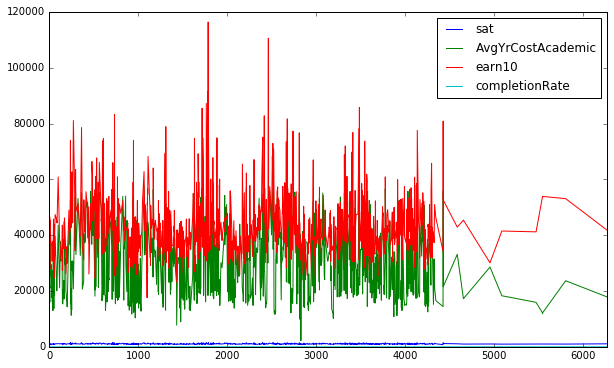

In [63]:
dfc.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A270EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011680080>]], dtype=object)

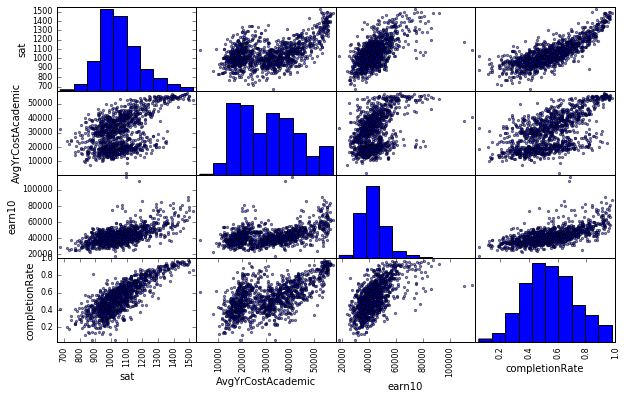

In [71]:
scatter_matrix(dfc)

In [64]:
import sklearn.preprocessing as skpp

In [67]:
dfnorm = pandas.DataFrame(skpp.normalize(dfc, axis=1)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})
dfnorm.describe()


,sat,cost,earn,gradrate
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.020306,0.559863,0.811218,0.000010
std,0.003536,0.138978,0.093612,0.000002
min,0.008879,0.058541,0.434900,0.000002
25%,0.017745,0.429005,0.743775,0.000009
50%,0.019860,0.603100,0.797427,0.000010
75%,0.022699,0.668159,0.902984,0.000012
max,0.035337,0.900296,0.997860,0.000018


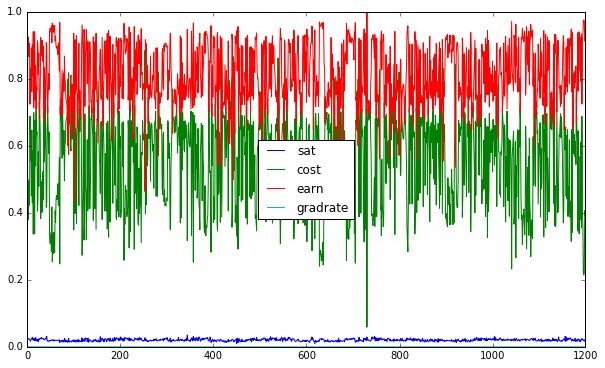

In [68]:
dfnorm.plot()

In [69]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B1C2518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F3252B0>]], dtype=object)

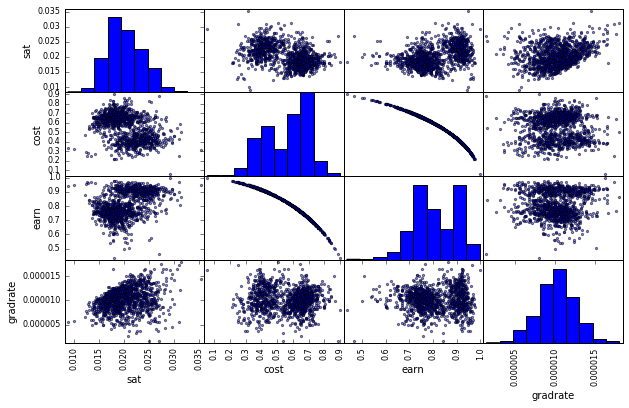

In [70]:
scatter_matrix(dfnorm)


In [72]:
dfscale = pandas.DataFrame(skpp.scale(dfc)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})
dfscale.describe()


,sat,cost,earn,gradrate
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,4.946044e-16,8.511710e-18,-2.812565e-17,5.458597e-17
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.805592e+00,-2.362261e+00,-2.492662e+00,-2.799796e+00
25%,-6.802915e-01,-9.135325e-01,-6.524693e-01,-7.222017e-01
50%,-1.672880e-01,-3.947251e-02,-1.585229e-01,-4.348992e-02
75%,4.996165e-01,7.381694e-01,4.032201e-01,6.589126e-01
max,3.423736e+00,2.212127e+00,7.076339e+00,2.392427e+00


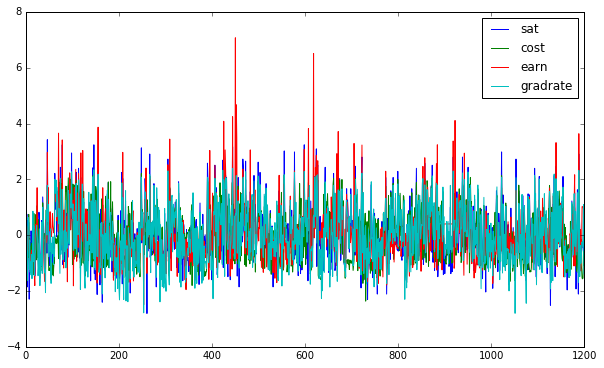

In [73]:
dfscale.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000114B9EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000132A0B70>]], dtype=object)

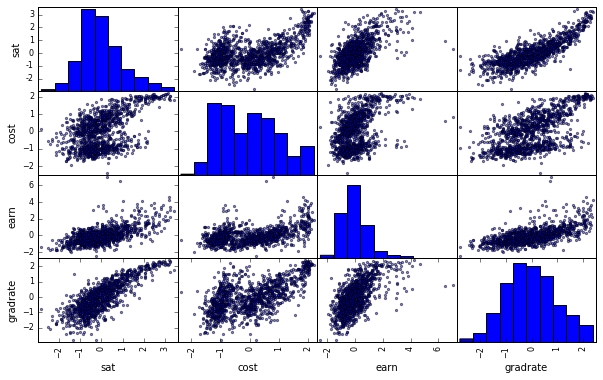

In [74]:
scatter_matrix(dfscale)

In [77]:
from sklearn.cluster import KMeans
km = KMeans(init='k-means++', n_clusters=3)
km.fit(dfscale)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [78]:
clusters = km.predict(dfscale)

In [79]:
clusters

array([1, 1, 0, ..., 1, 0, 1])

In [80]:
dfscale['cluster'] = clusters

In [81]:
dfscale.describe()

,sat,cost,earn,gradrate,cluster
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,4.946044e-16,8.511710e-18,-2.812565e-17,5.458597e-17,0.742500
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,0.715276
min,-2.805592e+00,-2.362261e+00,-2.492662e+00,-2.799796e+00,0.000000
25%,-6.802915e-01,-9.135325e-01,-6.524693e-01,-7.222017e-01,0.000000
50%,-1.672880e-01,-3.947251e-02,-1.585229e-01,-4.348992e-02,1.000000
75%,4.996165e-01,7.381694e-01,4.032201e-01,6.589126e-01,1.000000
max,3.423736e+00,2.212127e+00,7.076339e+00,2.392427e+00,2.000000


In [123]:
dfscale

,sat,cost,earn,gradrate,cluster
0,-1.779585,-1.308062,-1.156101,-1.314611,0
1,0.565574,-0.929657,-0.294116,-0.586403,0
2,0.748790,-0.968885,0.316053,-0.544098,2
3,-1.852871,-1.223743,-1.504769,-1.624847,0
4,0.528931,-0.753421,-0.090726,0.607724,2
5,0.455645,-0.798099,0.199830,0.635363,2
6,0.455645,0.746903,-0.139152,0.448657,2
7,-2.292588,-0.462969,-0.555617,-1.223233,0
8,-0.247903,-0.118506,-0.604043,-0.176327,2
9,-0.900150,-1.080705,-0.797748,-1.325329,0


Dataframe visualization: see http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [124]:
dfscale.columns
dfscale.dtypes

sat         float64
cost        float64
earn        float64
gradrate    float64
cluster       int32
dtype: object

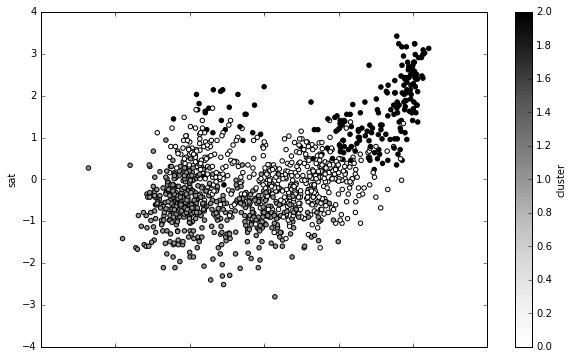

In [84]:
dfscale.plot.scatter(x='cost', y='sat', c='cluster');

We can also plot using matplotlib directly

http://matplotlib.org/1.5.0/api/index.html

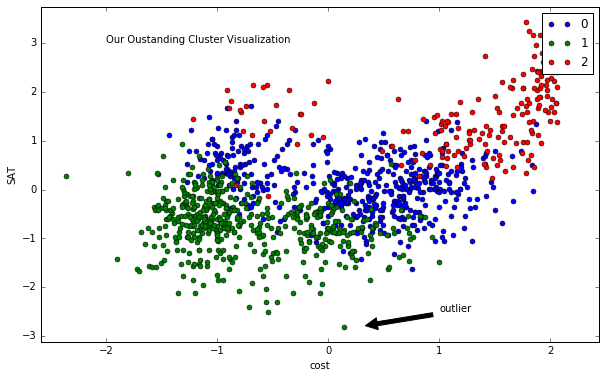

In [106]:
import matplotlib.pyplot as plt

groups = dfscale.groupby('cluster')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.cost, group.sat, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel("cost")
ax.set_ylabel("SAT")
ax.text(-2, 3, 'Our Oustanding Cluster Visualization')
ax.annotate('outlier', xy=(0.3, -2.8), xytext=(1, -2.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [93]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017F88828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000018DE42E8>]], dtype=object)

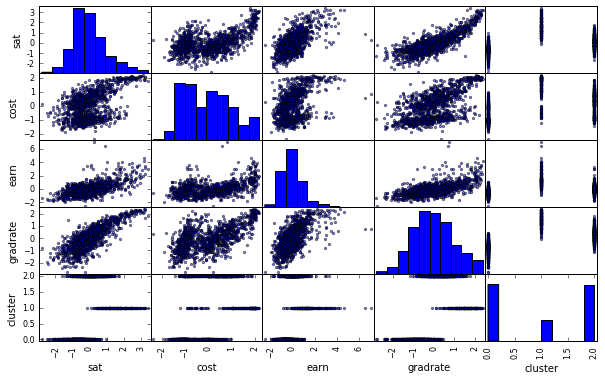

In [126]:
scatter_matrix(dfscale)

Build a pipeline: preprocess and cluster data

In [107]:
# we can extract data belonging to a particular cluster
dfscale[dfscale['cluster'] == 0].describe()

,sat,cost,earn,gradrate,cluster
count,501.000000,501.000000,501.000000,501.000000,501.0
mean,0.094056,0.219034,0.019735,0.300656,0.0
std,0.566527,0.727300,0.627764,0.508098,0.0
min,-1.633012,-1.436730,-1.814696,-1.171339,0.0
25%,-0.306532,-0.401030,-0.400653,-0.047156,0.0
50%,0.089214,0.349421,-0.003559,0.304820,0.0
75%,0.455645,0.763915,0.403220,0.641003,0.0
max,1.701510,1.870721,3.289417,1.785492,0.0


Let's try another clustering algorithm

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [121]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN() # defaults
df = pandas.DataFrame(skpp.scale(dfc)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})
clusters = dbs.fit_predict(df)
df['cluster'] = clusters
df.describe()

,sat,cost,earn,gradrate,cluster
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,4.946044e-16,8.511710e-18,-2.812565e-17,5.458597e-17,-0.119167
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,0.406329
min,-2.805592e+00,-2.362261e+00,-2.492662e+00,-2.799796e+00,-1.000000
25%,-6.802915e-01,-9.135325e-01,-6.524693e-01,-7.222017e-01,0.000000
50%,-1.672880e-01,-3.947251e-02,-1.585229e-01,-4.348992e-02,0.000000
75%,4.996165e-01,7.381694e-01,4.032201e-01,6.589126e-01,0.000000
max,3.423736e+00,2.212127e+00,7.076339e+00,2.392427e+00,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B76C390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001DDA1E80>]], dtype=object)

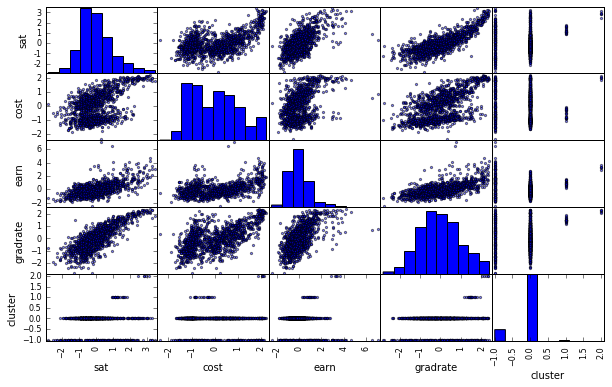

In [122]:
scatter_matrix(df)

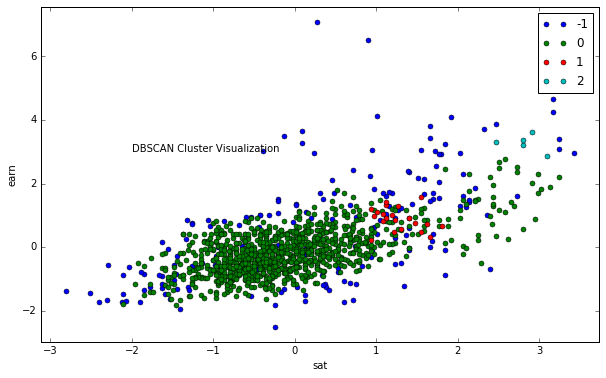

In [125]:
import matplotlib.pyplot as plt

groups = df.groupby('cluster')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.sat, group.earn, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel("sat")
ax.set_ylabel("earn")
ax.text(-2, 3, 'DBSCAN Cluster Visualization')


plt.show()

In [11]:
# temporal data
# I found that 2010 and 2011 are the only years with earnings data, reported
# for graduates six years prior (2006 and 2007)
# However 2009-2013 are the only years with cost data.


query = """
SELECT UNITID,
       INSTNM,
       CONTROL as type,
       COSTT4_A cost,
       Year
FROM Scorecard

where cost is not null

"""



dft = pandas.read_sql(query, conn)
dft.describe()
dft

,UNITID,INSTNM,type,cost,Year
0,100654,Alabama A & M University,Public,13242,2009
1,100663,University of Alabama at Birmingham,Public,16955,2009
2,100690,Amridge University,Private nonprofit,20100,2009
3,100706,University of Alabama in Huntsville,Public,16876,2009
4,100724,Alabama State University,Public,14000,2009
5,100751,The University of Alabama,Public,20496,2009
6,100760,Central Alabama Community College,Public,6658,2009
7,100830,Auburn University at Montgomery,Public,13372,2009
8,100858,Auburn University Main Campus,Public,17966,2009
9,100937,Birmingham Southern College,Private nonprofit,36504,2009


In [20]:
# explore split-apply-combine with Pandas dataframes

grouped = dft.groupby(['type', 'Year'])
grouped.cost.mean()



type                Year
Private for-profit  2009    24722.214583
                    2010    25019.942885
                    2011    25842.545859
                    2012    25399.297345
                    2013    25654.190860
Private nonprofit   2009    29796.706355
                    2010    31130.604091
                    2011    32241.484454
                    2012    33442.437139
                    2013    34523.774839
Public              2009    12671.031953
                    2010    13253.603751
                    2011    13776.619163
                    2012    14322.836207
                    2013    14686.991369
Name: cost, dtype: float64

In [23]:
grouped.cost.describe()

type                Year       
Private for-profit  2009  count      960.000000
                          mean     24722.214583
                          std       7417.268359
                          min       5286.000000
                          25%      20105.750000
                          50%      24818.000000
                          75%      27631.750000
                          max      58535.000000
                    2010  count     1033.000000
                          mean     25019.942885
                          std       6109.575965
                          min       5102.000000
                          25%      21416.000000
                          50%      25119.000000
                          75%      28882.000000
                          max      54924.000000
                    2011  count     1123.000000
                          mean     25842.545859
                          std       6168.921507
                          min       5286.000000
        

In [19]:
grouped.size()

type                Year
Private for-profit  2009     960
                    2010    1033
                    2011    1123
                    2012    1130
                    2013    1116
Private nonprofit   2009    1369
                    2010    1369
                    2011    1383
                    2012    1384
                    2013    1399
Public              2009    1690
                    2010    1653
                    2011    1649
                    2012    1624
                    2013    1622
dtype: int64

In [29]:
x = grouped.cost.mean()
x

type                Year
Private for-profit  2009    24722.214583
                    2010    25019.942885
                    2011    25842.545859
                    2012    25399.297345
                    2013    25654.190860
Private nonprofit   2009    29796.706355
                    2010    31130.604091
                    2011    32241.484454
                    2012    33442.437139
                    2013    34523.774839
Public              2009    12671.031953
                    2010    13253.603751
                    2011    13776.619163
                    2012    14322.836207
                    2013    14686.991369
Name: cost, dtype: float64

In [28]:
x.get_values()

array([ 24722.21458333,  25019.9428848 ,  25842.54585931,  25399.29734513,
        25654.19086022,  29796.706355  ,  31130.60409058,  32241.48445409,
        33442.43713873,  34523.77483917,  12671.03195266,  13253.60375076,
        13776.61916313,  14322.8362069 ,  14686.99136868])

In [30]:
x.keys()

MultiIndex(levels=[[u'Private for-profit', u'Private nonprofit', u'Public'], [2009, 2010, 2011, 2012, 2013]],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[u'type', u'Year'])

In [53]:
pandas.DataFrame(x)

cost
type               Year              
Private for-profit 2009  24722.214583
                   2010  25019.942885
                   2011  25842.545859
                   2012  25399.297345
                   2013  25654.190860
Private nonprofit  2009  29796.706355
                   2010  31130.604091
                   2011  32241.484454
                   2012  33442.437139
                   2013  34523.774839
Public             2009  12671.031953
                   2010  13253.603751
                   2011  13776.619163
                   2012  14322.836207
                   2013  14686.991369

PCA